### Problem 1 (10 Points)

Sketch graphically the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad f({\bf x})=(x_1+1)^2+(x_2-2)^2\\
{\text{subject to }} & \quad g_1 = x_1-2\leq 0,{\quad} g_3 = -x_1\leq 0,\\
& \quad g_2 = x_2-1\leq 0, {\quad} g_4 = -x_2\leq 0.
\end{aligned}
$$

Find the optimum graphically. Determine directions of feasible descent at the corner points of the feasible domain. Show the gradient directions of $f$ and $g_i$s at these points. Verify graphical results analytically using the KKT conditions.


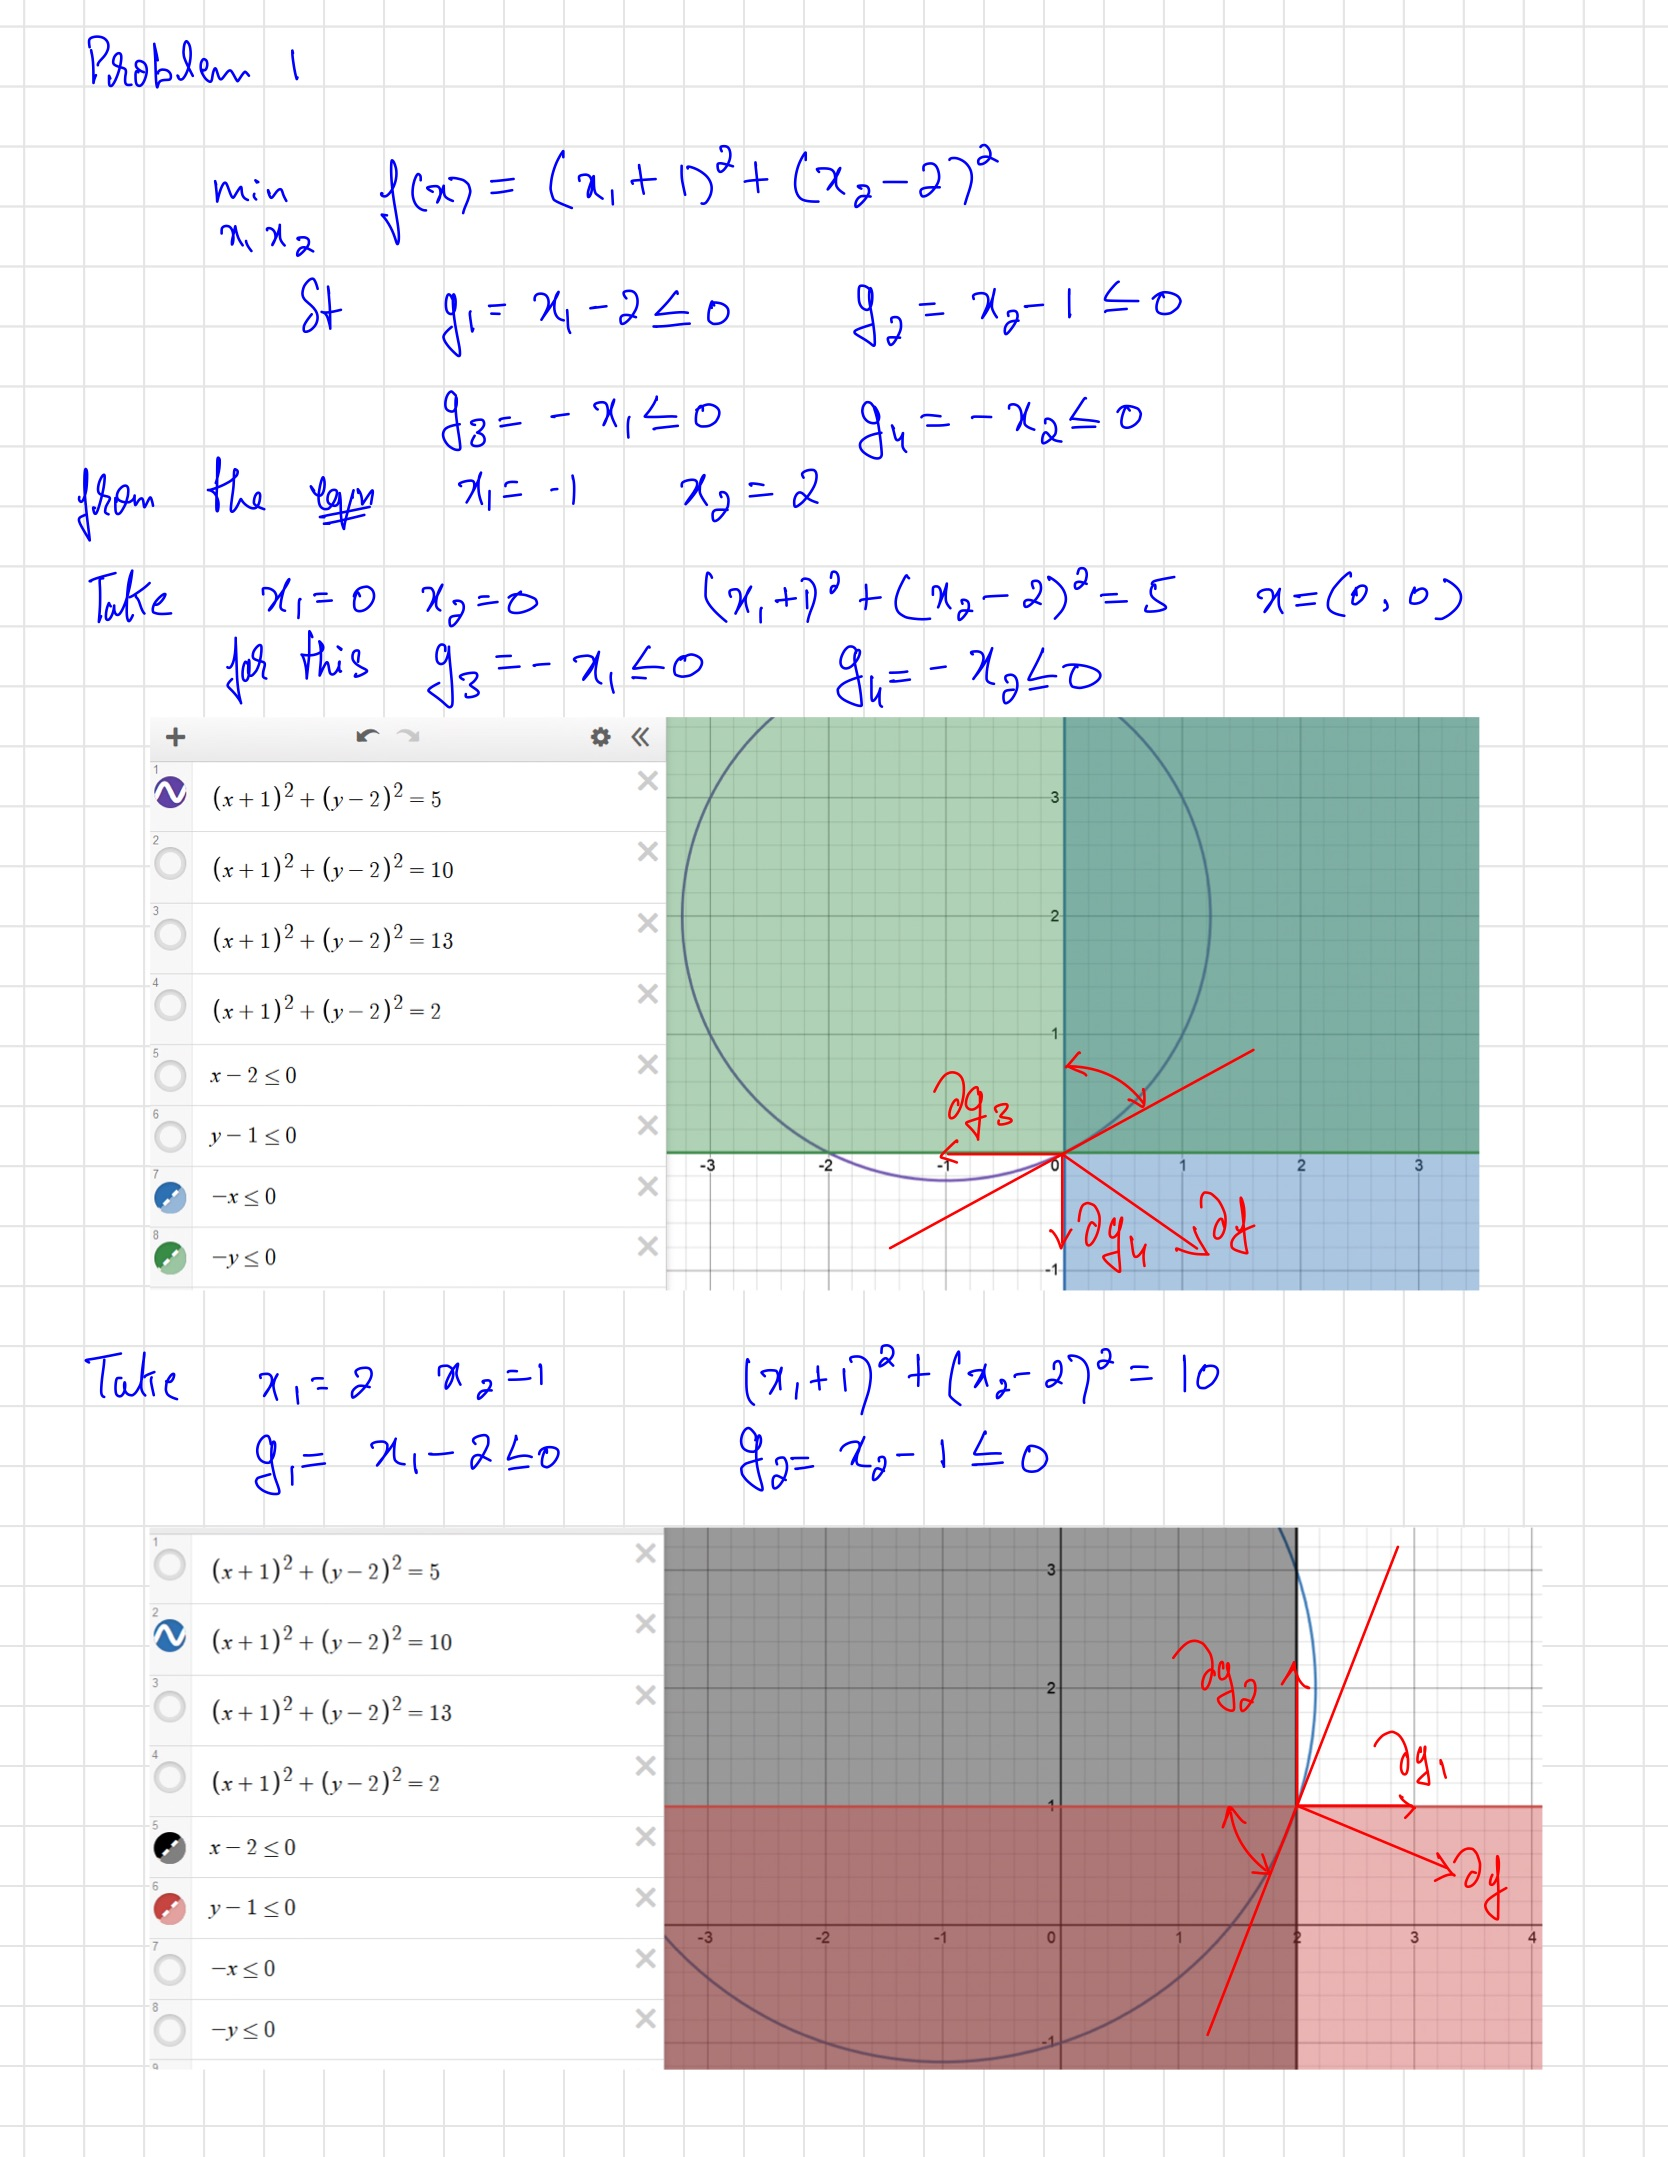

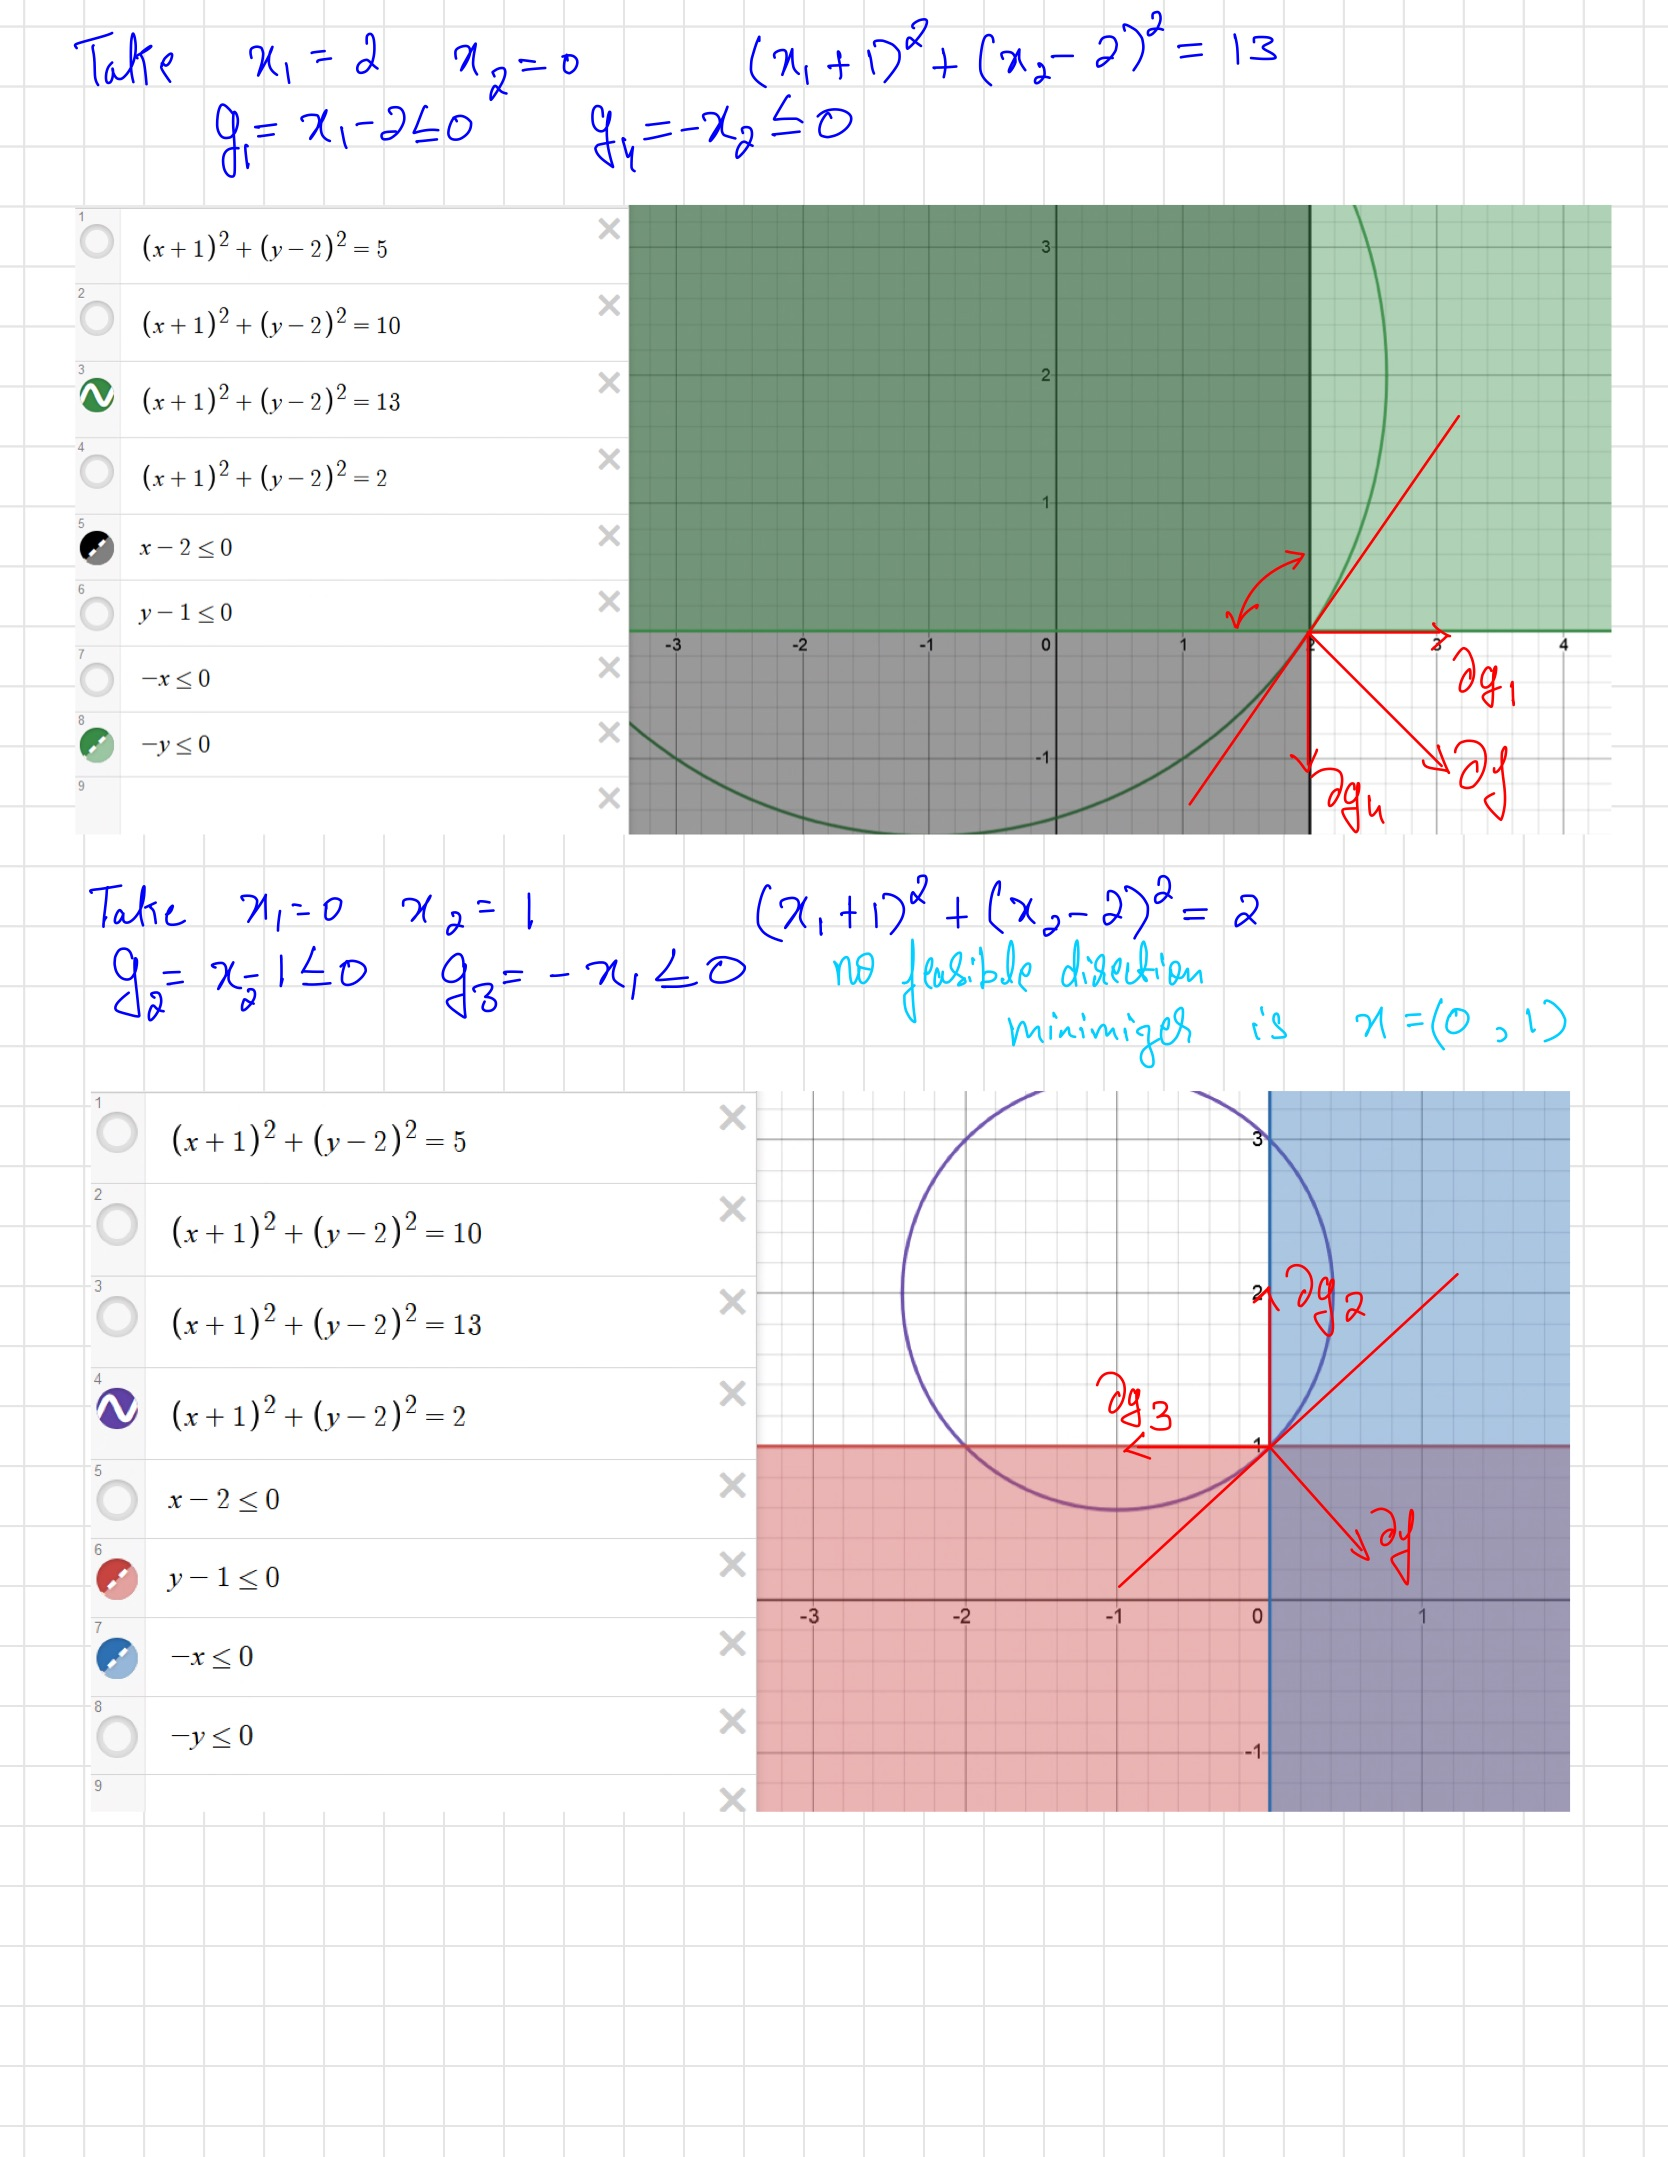

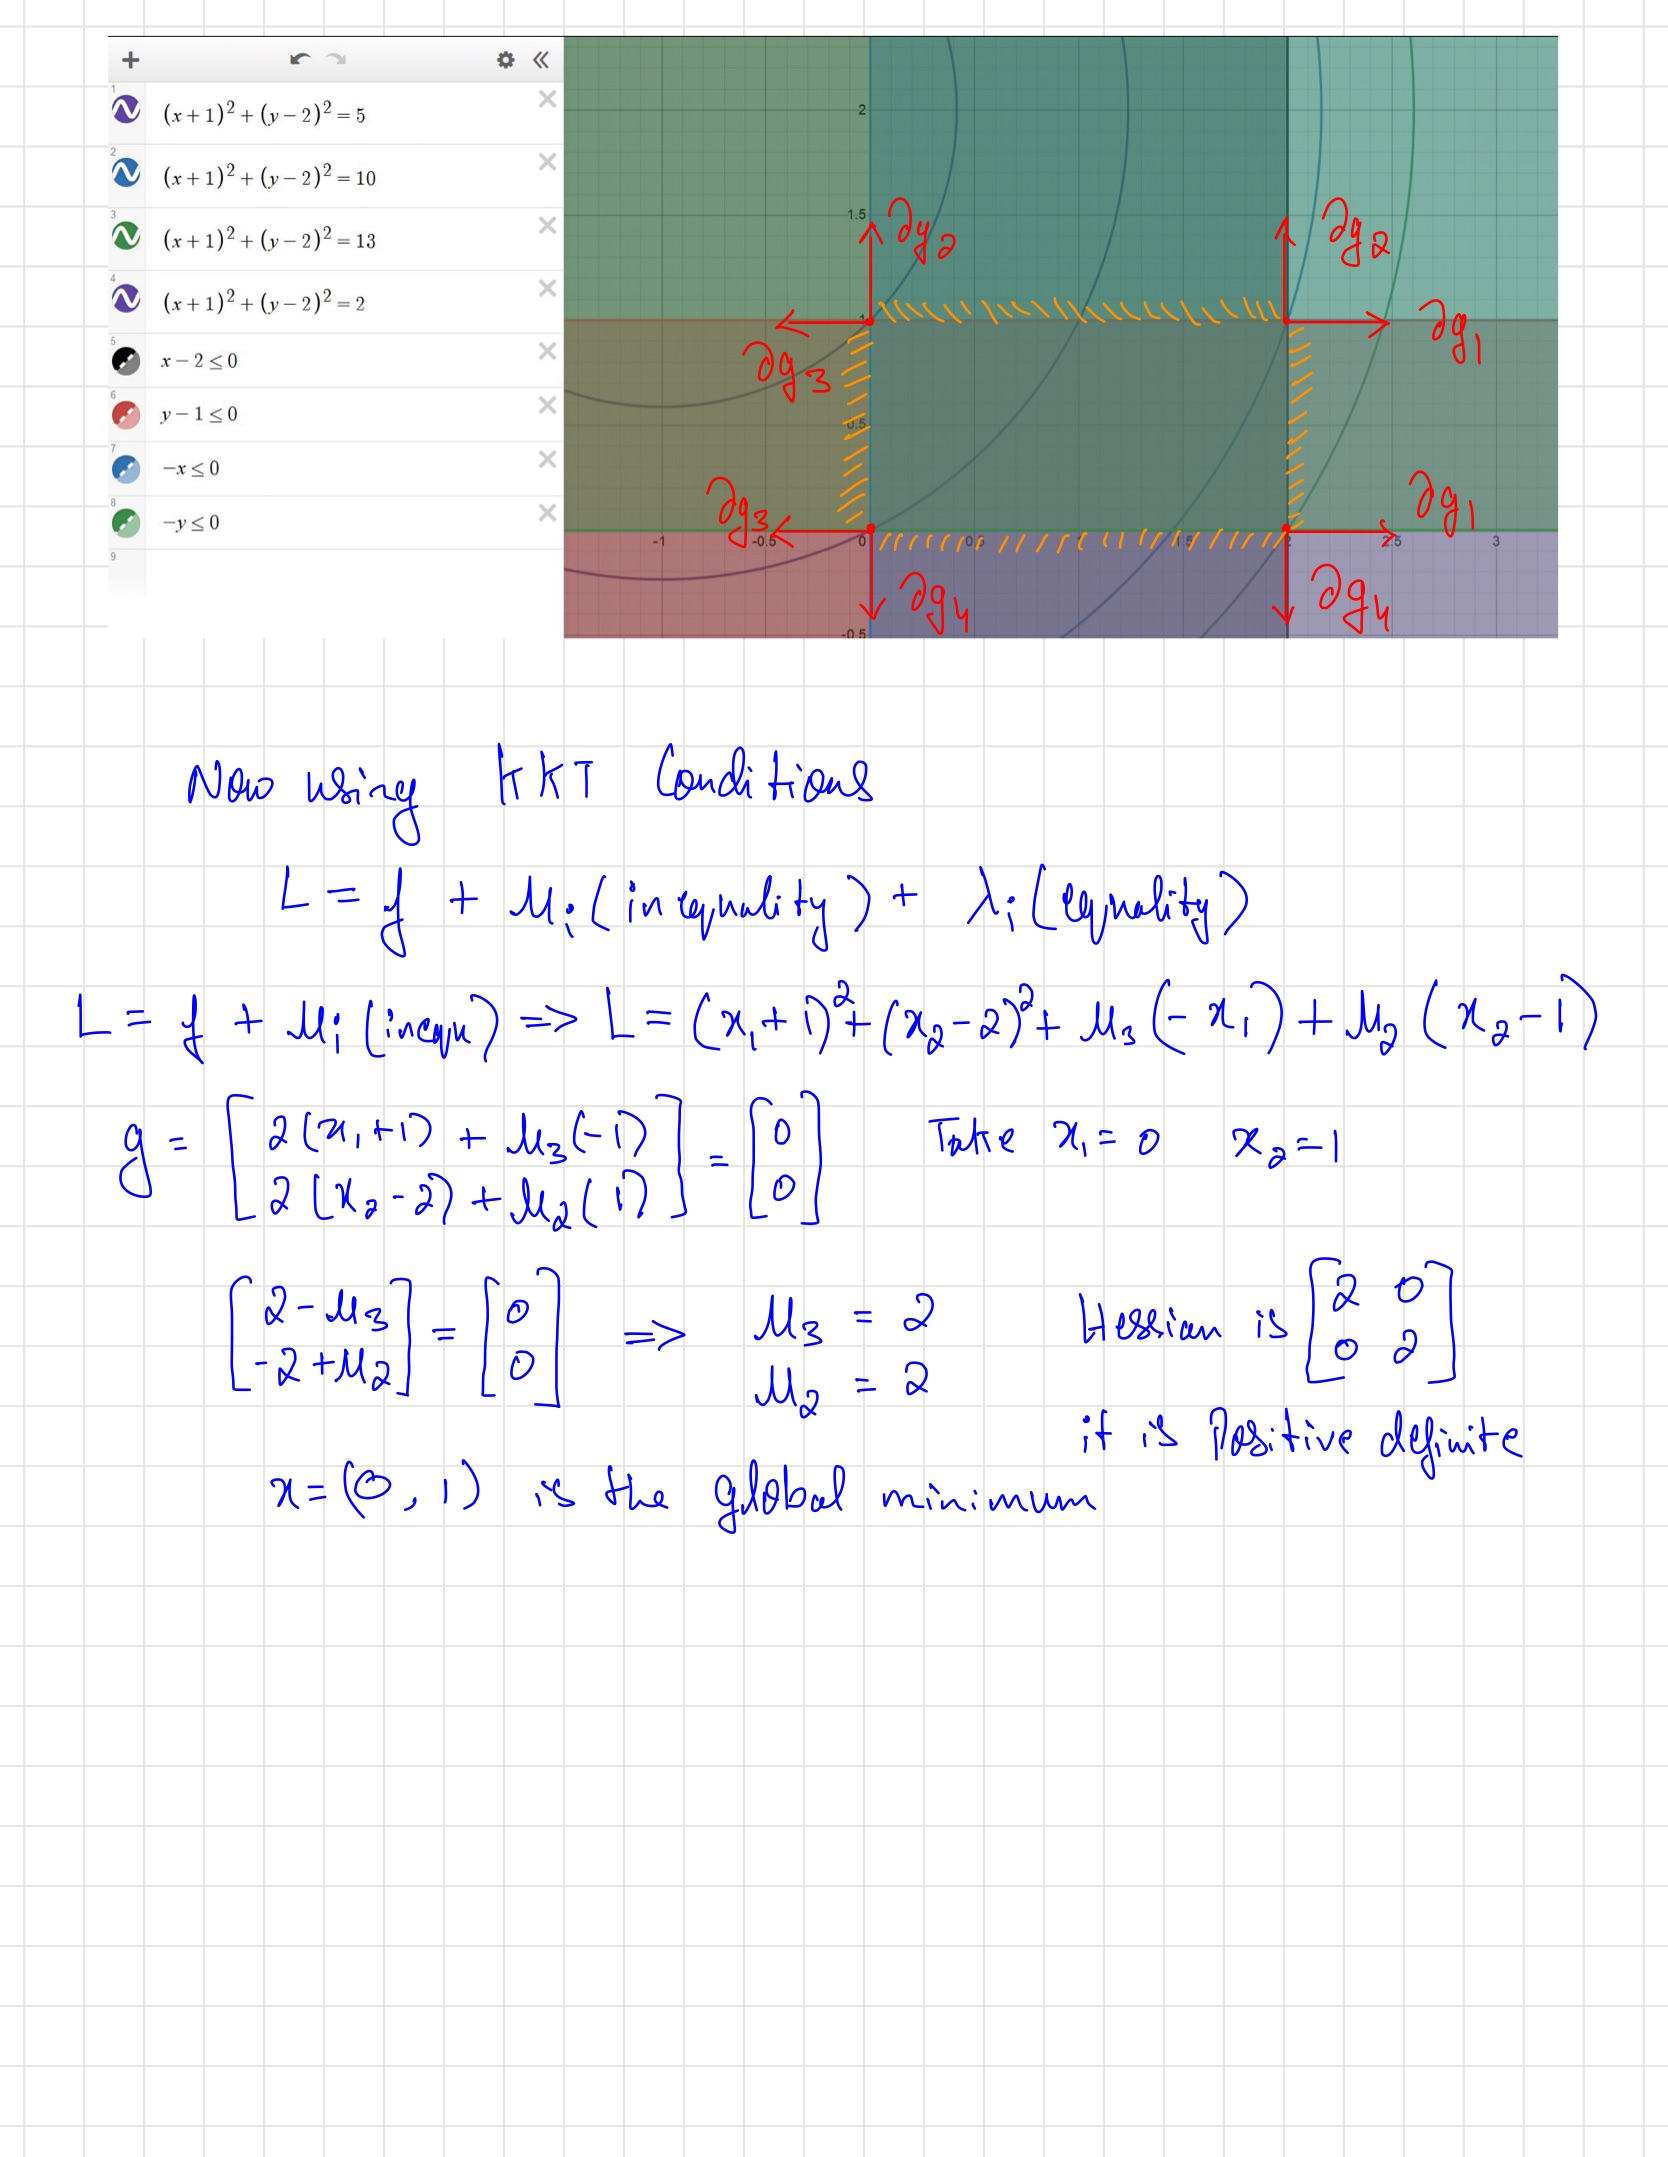

### Problem 2 (10 Points)

Graph the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad  f=-x_1\\
{\text{subject to }} & \quad g_1=x_2-(1-x_1)^3\leq 0{\quad} {\rm and}{\quad} x_2\geq 0.
\end{aligned}
$$ 

Find the solution graphically. Then apply the optimality conditions. Can you find a solution based on the optimality conditions? Why? (From Kuhn and Tucker, 1951.)

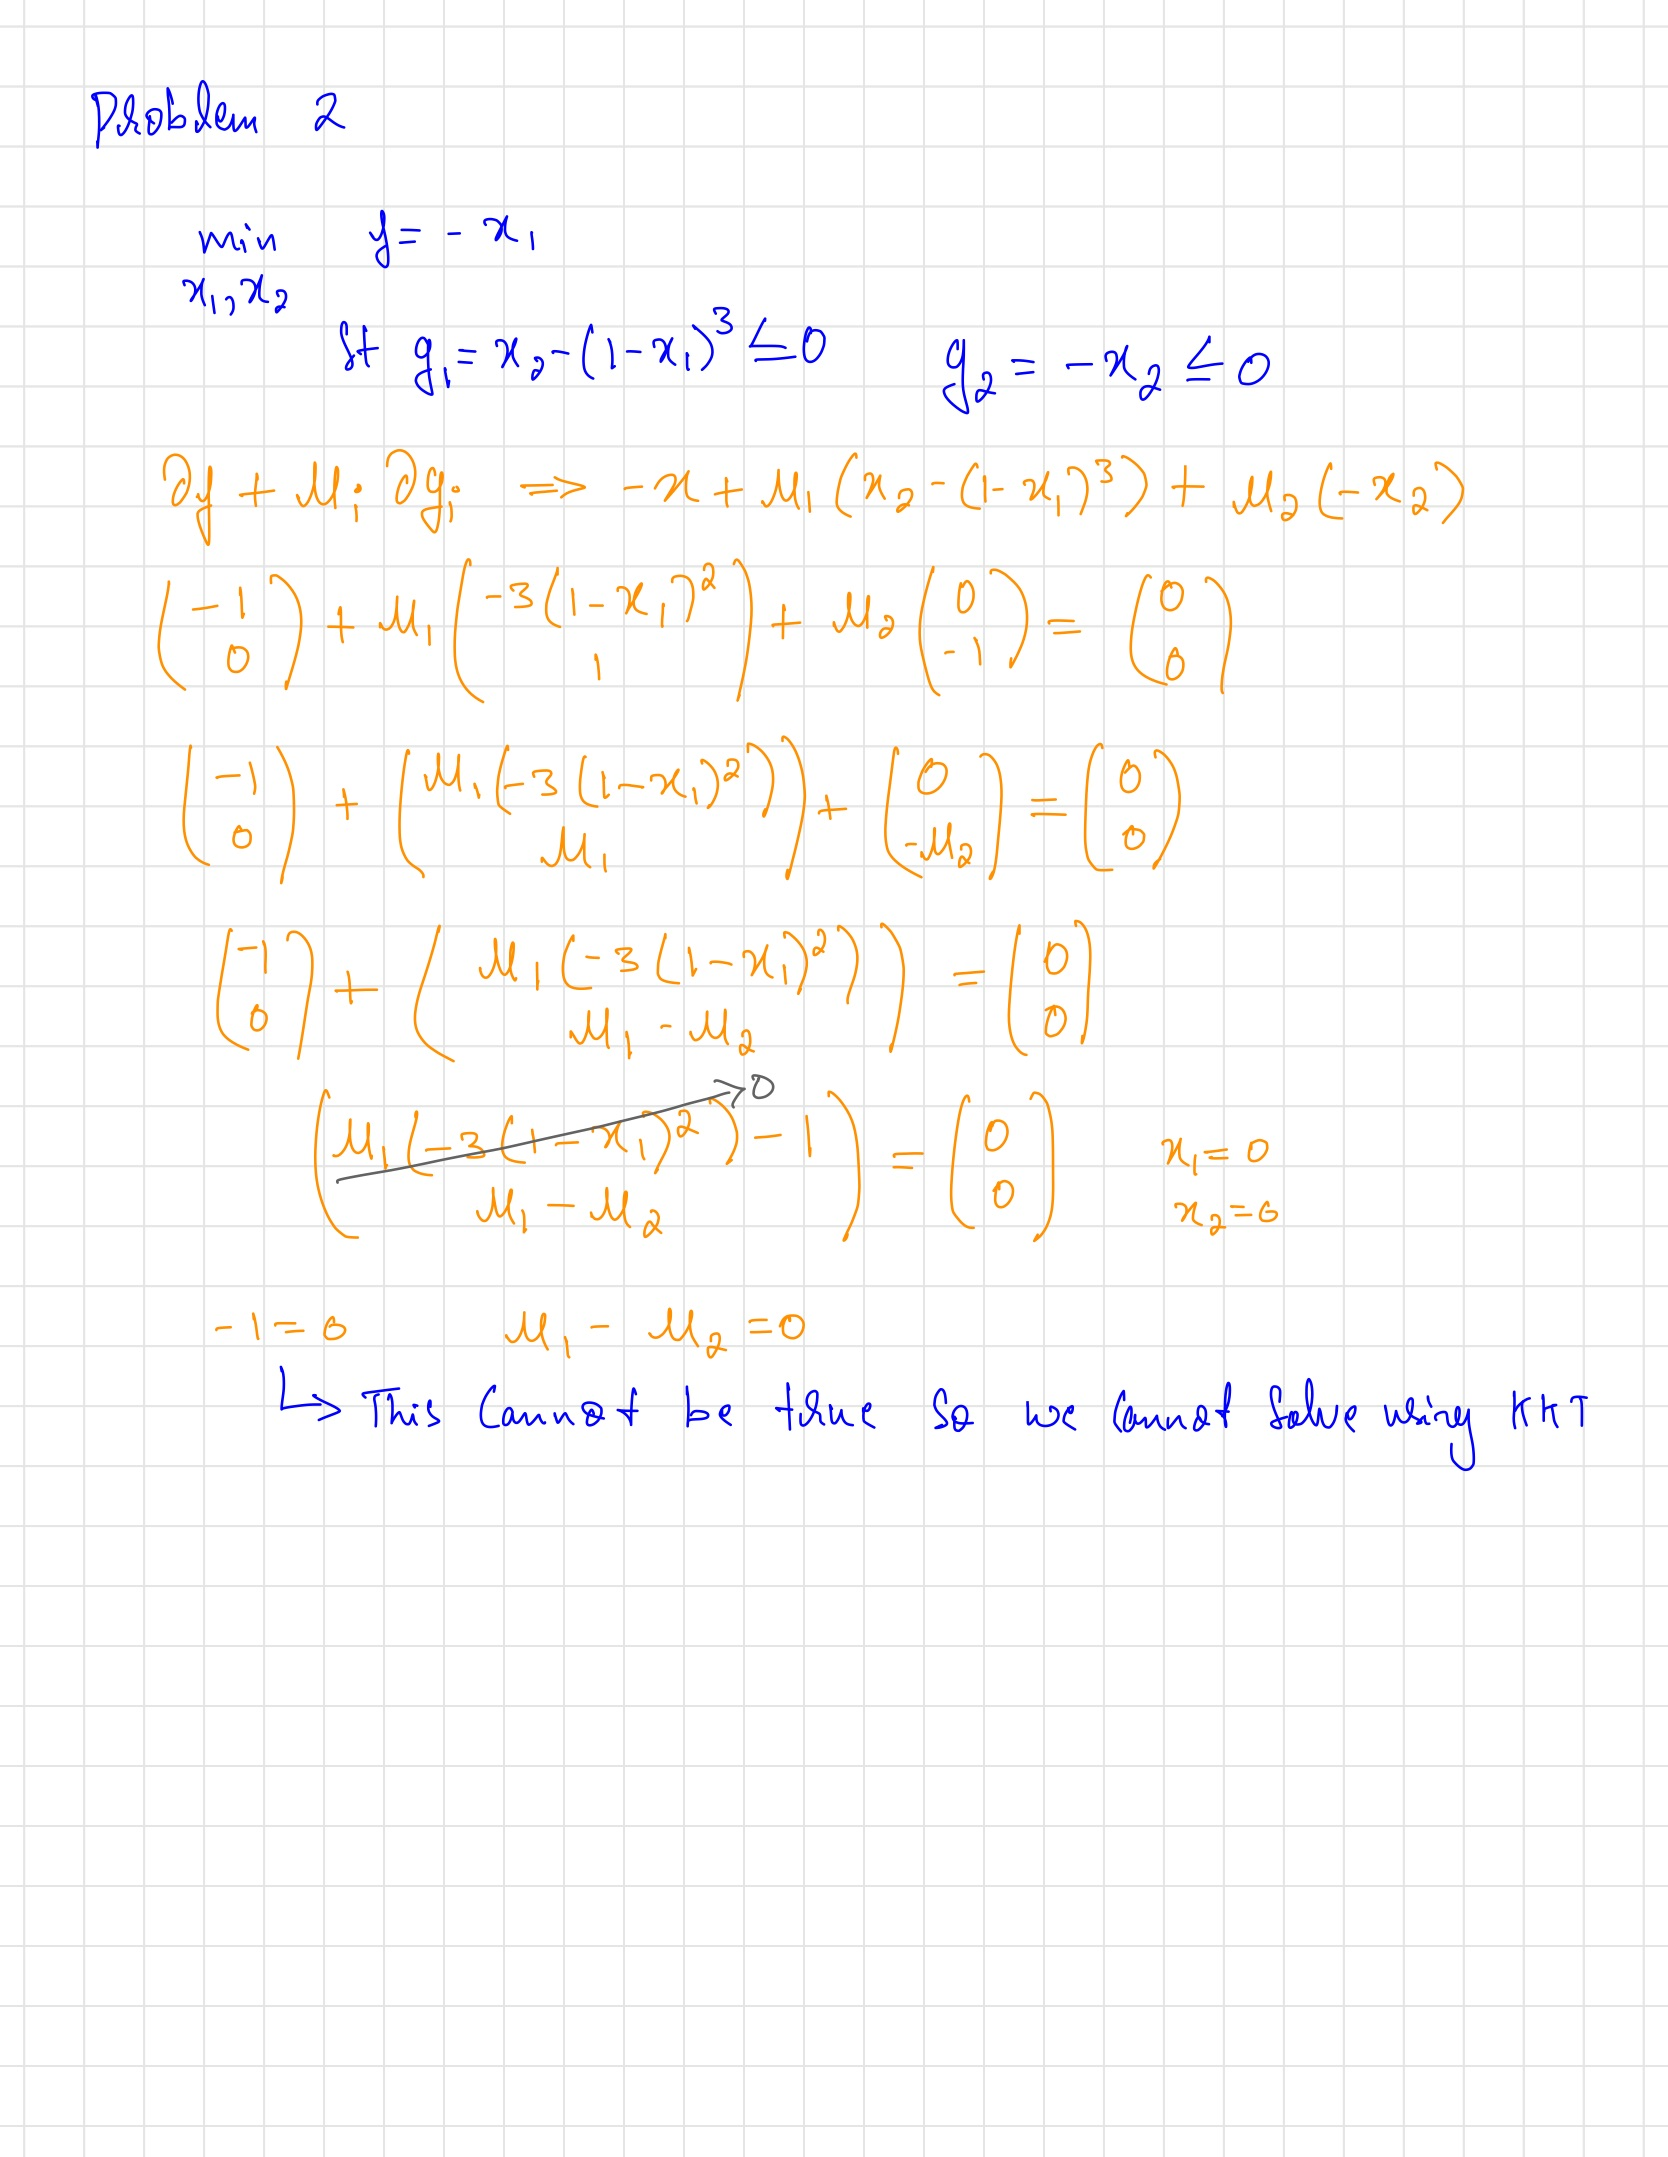

### Problem 3 (30 Points)

Find a local solution to the problem 

$$
\begin{aligned}
\max_{x_1,x_2,x_3} & \quad  f=x_1x_2+x_2x_3+x_1x_3\\
{\text{subject to }} & \quad h=x_1+x_2+x_3-3=0.
\end{aligned}
$$ 

Use two methods: reduced gradient and Lagrange multipliers.

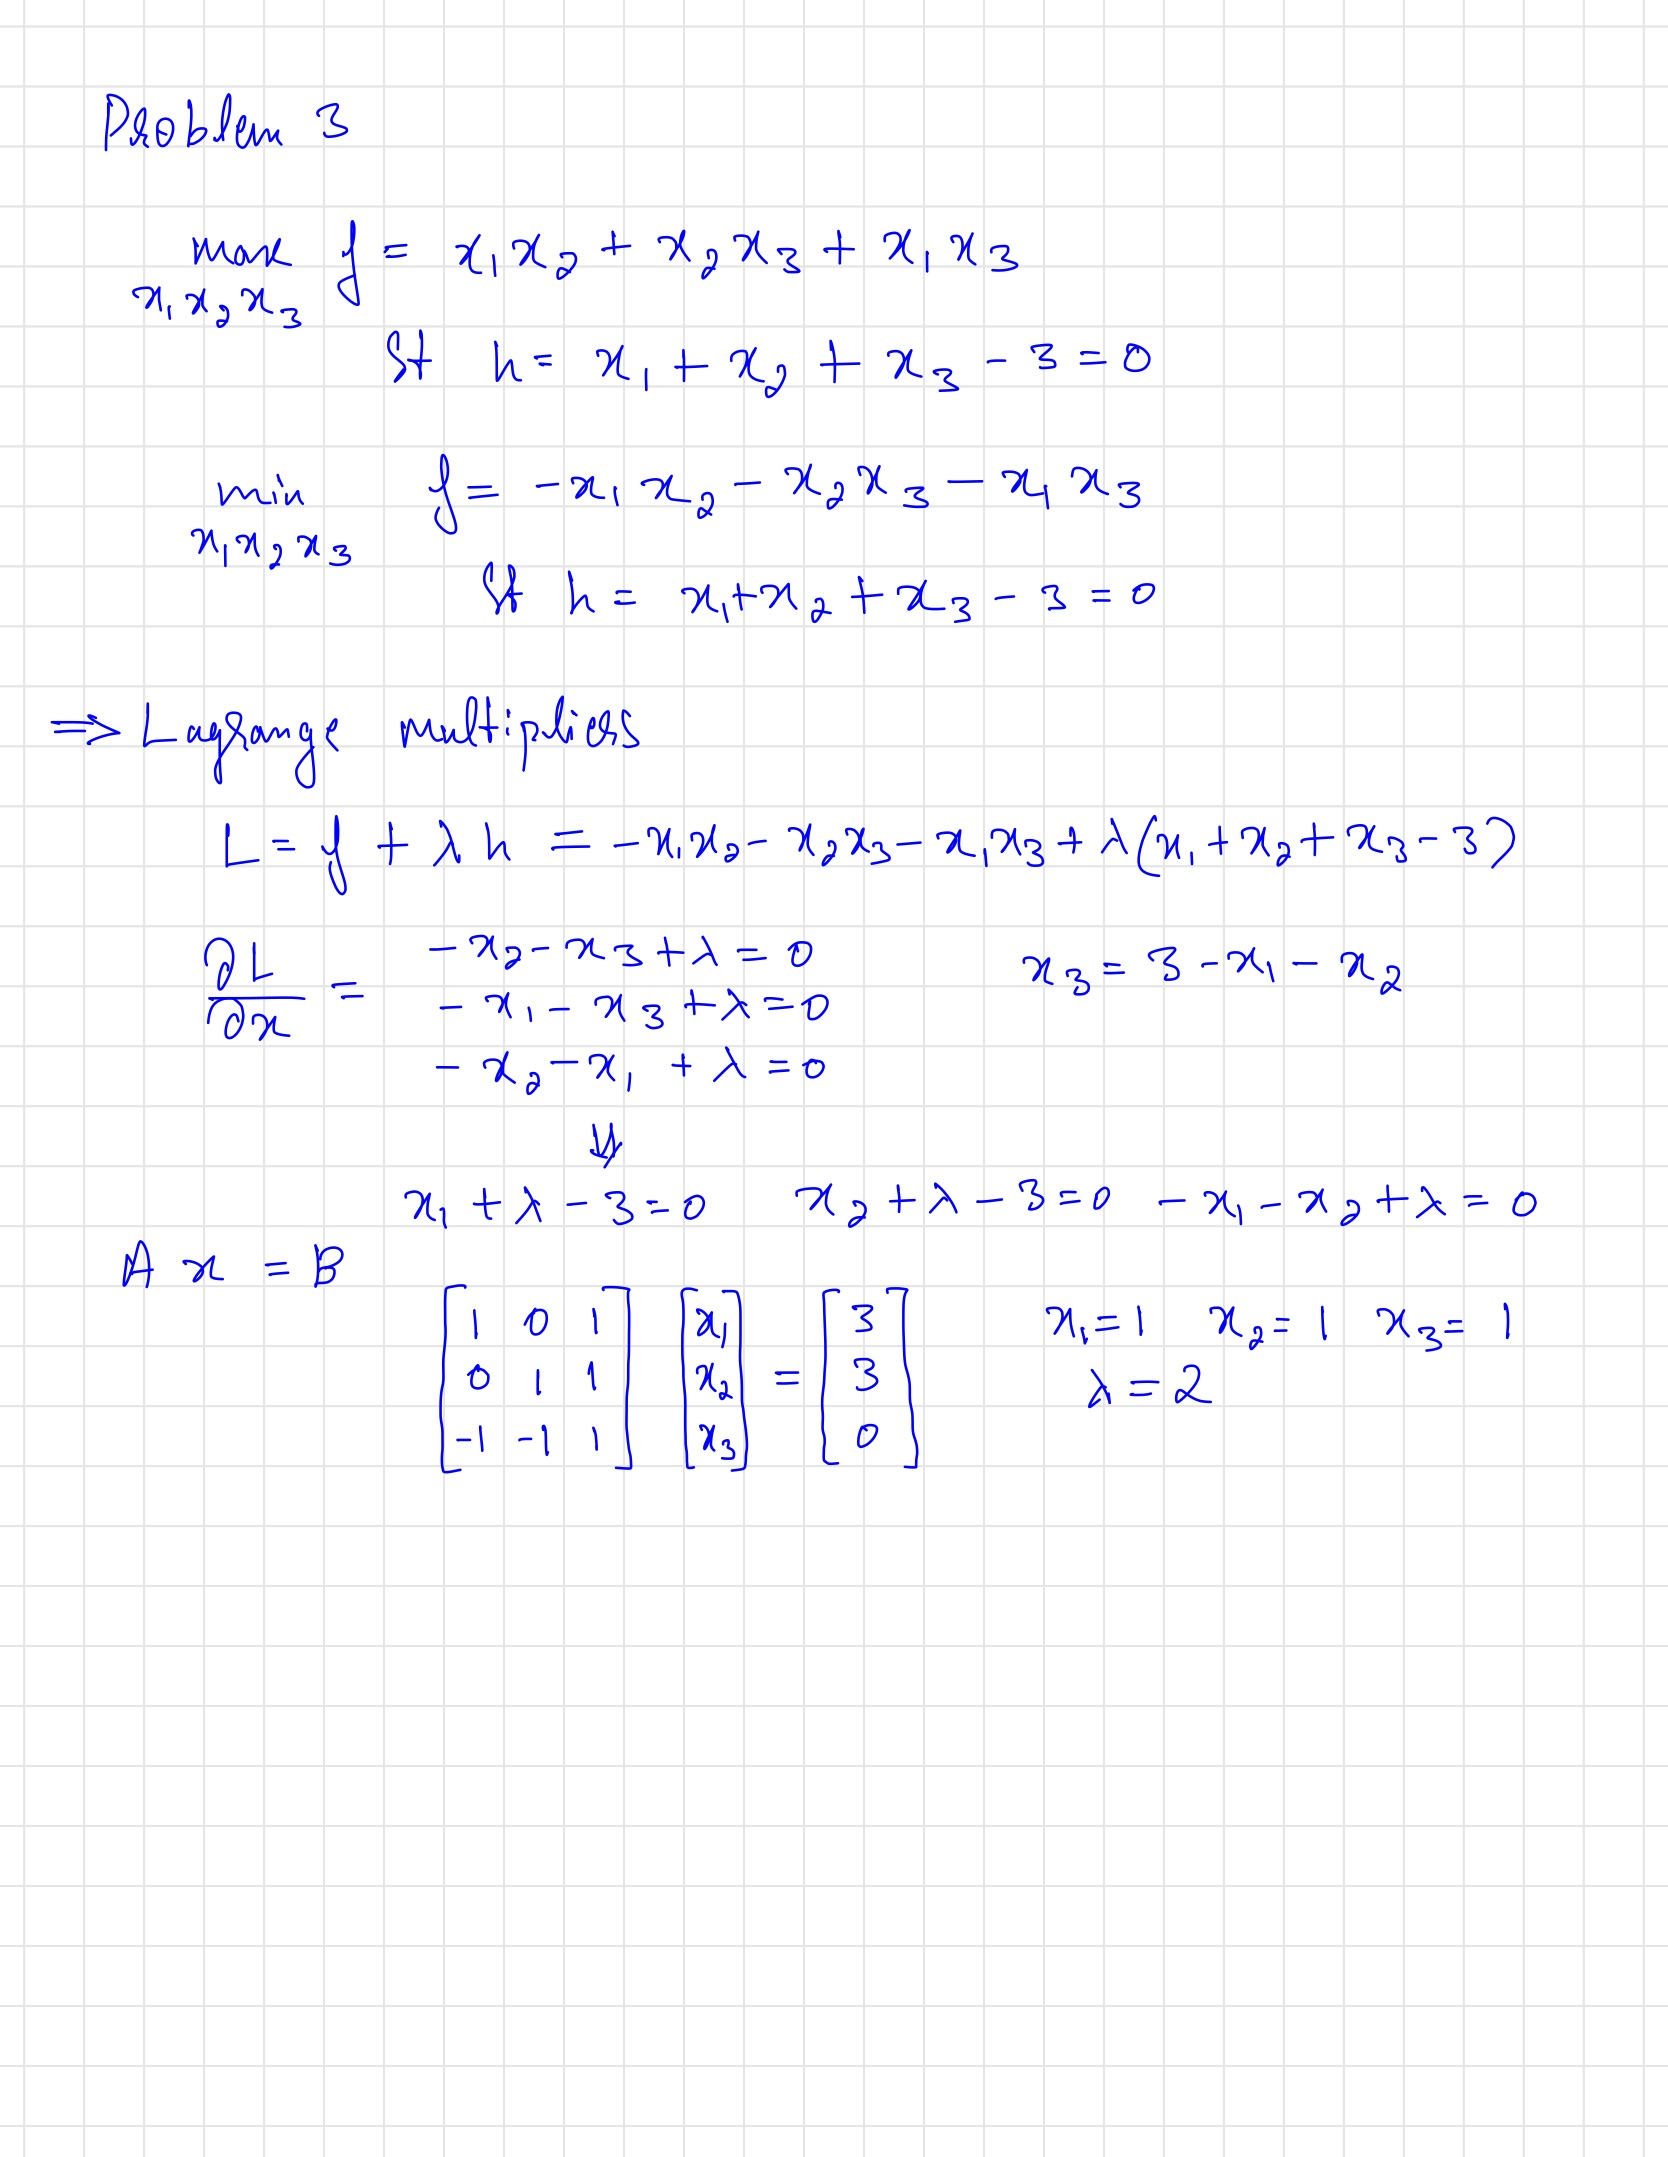

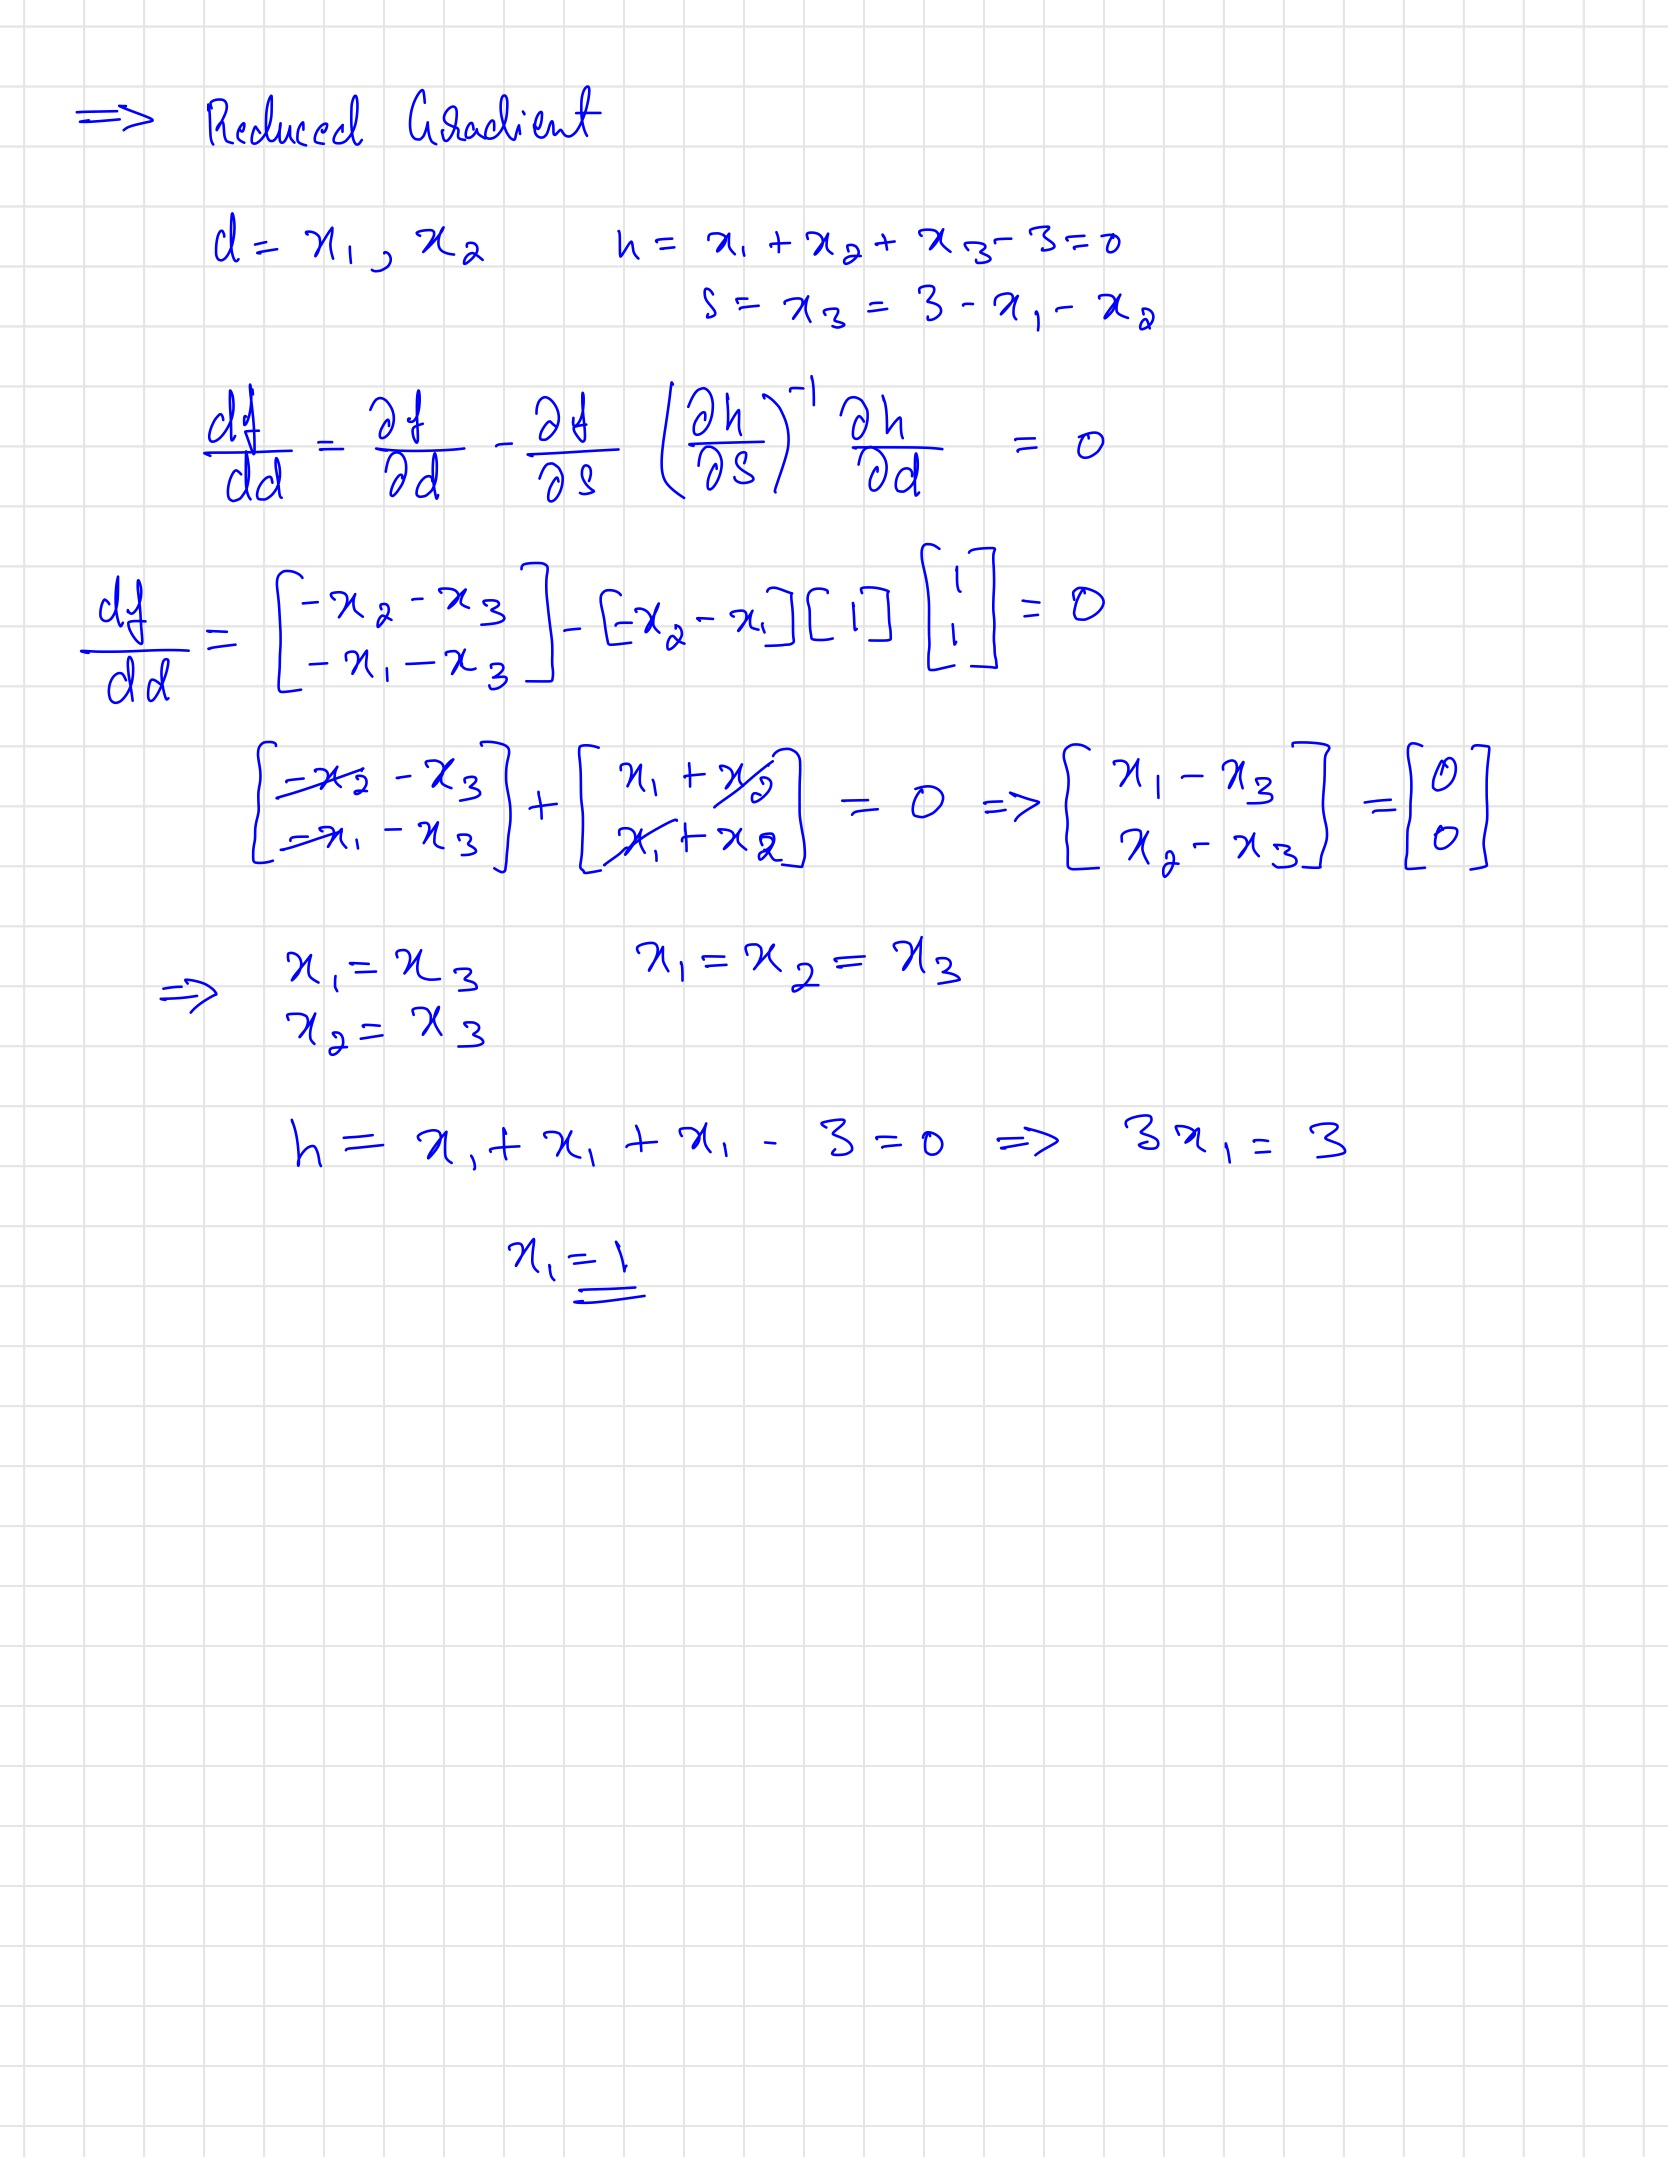

### Problem 4 (20 Points)

Use reduced gradient to	find the value(s) of the parameter $b$ for which the point $x_1=1$, $x_2=2$ is the solution to the problem 

$$
\begin{aligned}
\max_{x_1,x_2} & \quad  f=2x_{1} + bx_2\\
{\text{subject to }} & \quad g_1 = x_{1}^{2}+ x_{2}^{2}-5\leq 0\\
& \quad g_2= x_1- x_2-2\leq 0.
\end{aligned}
$$ 

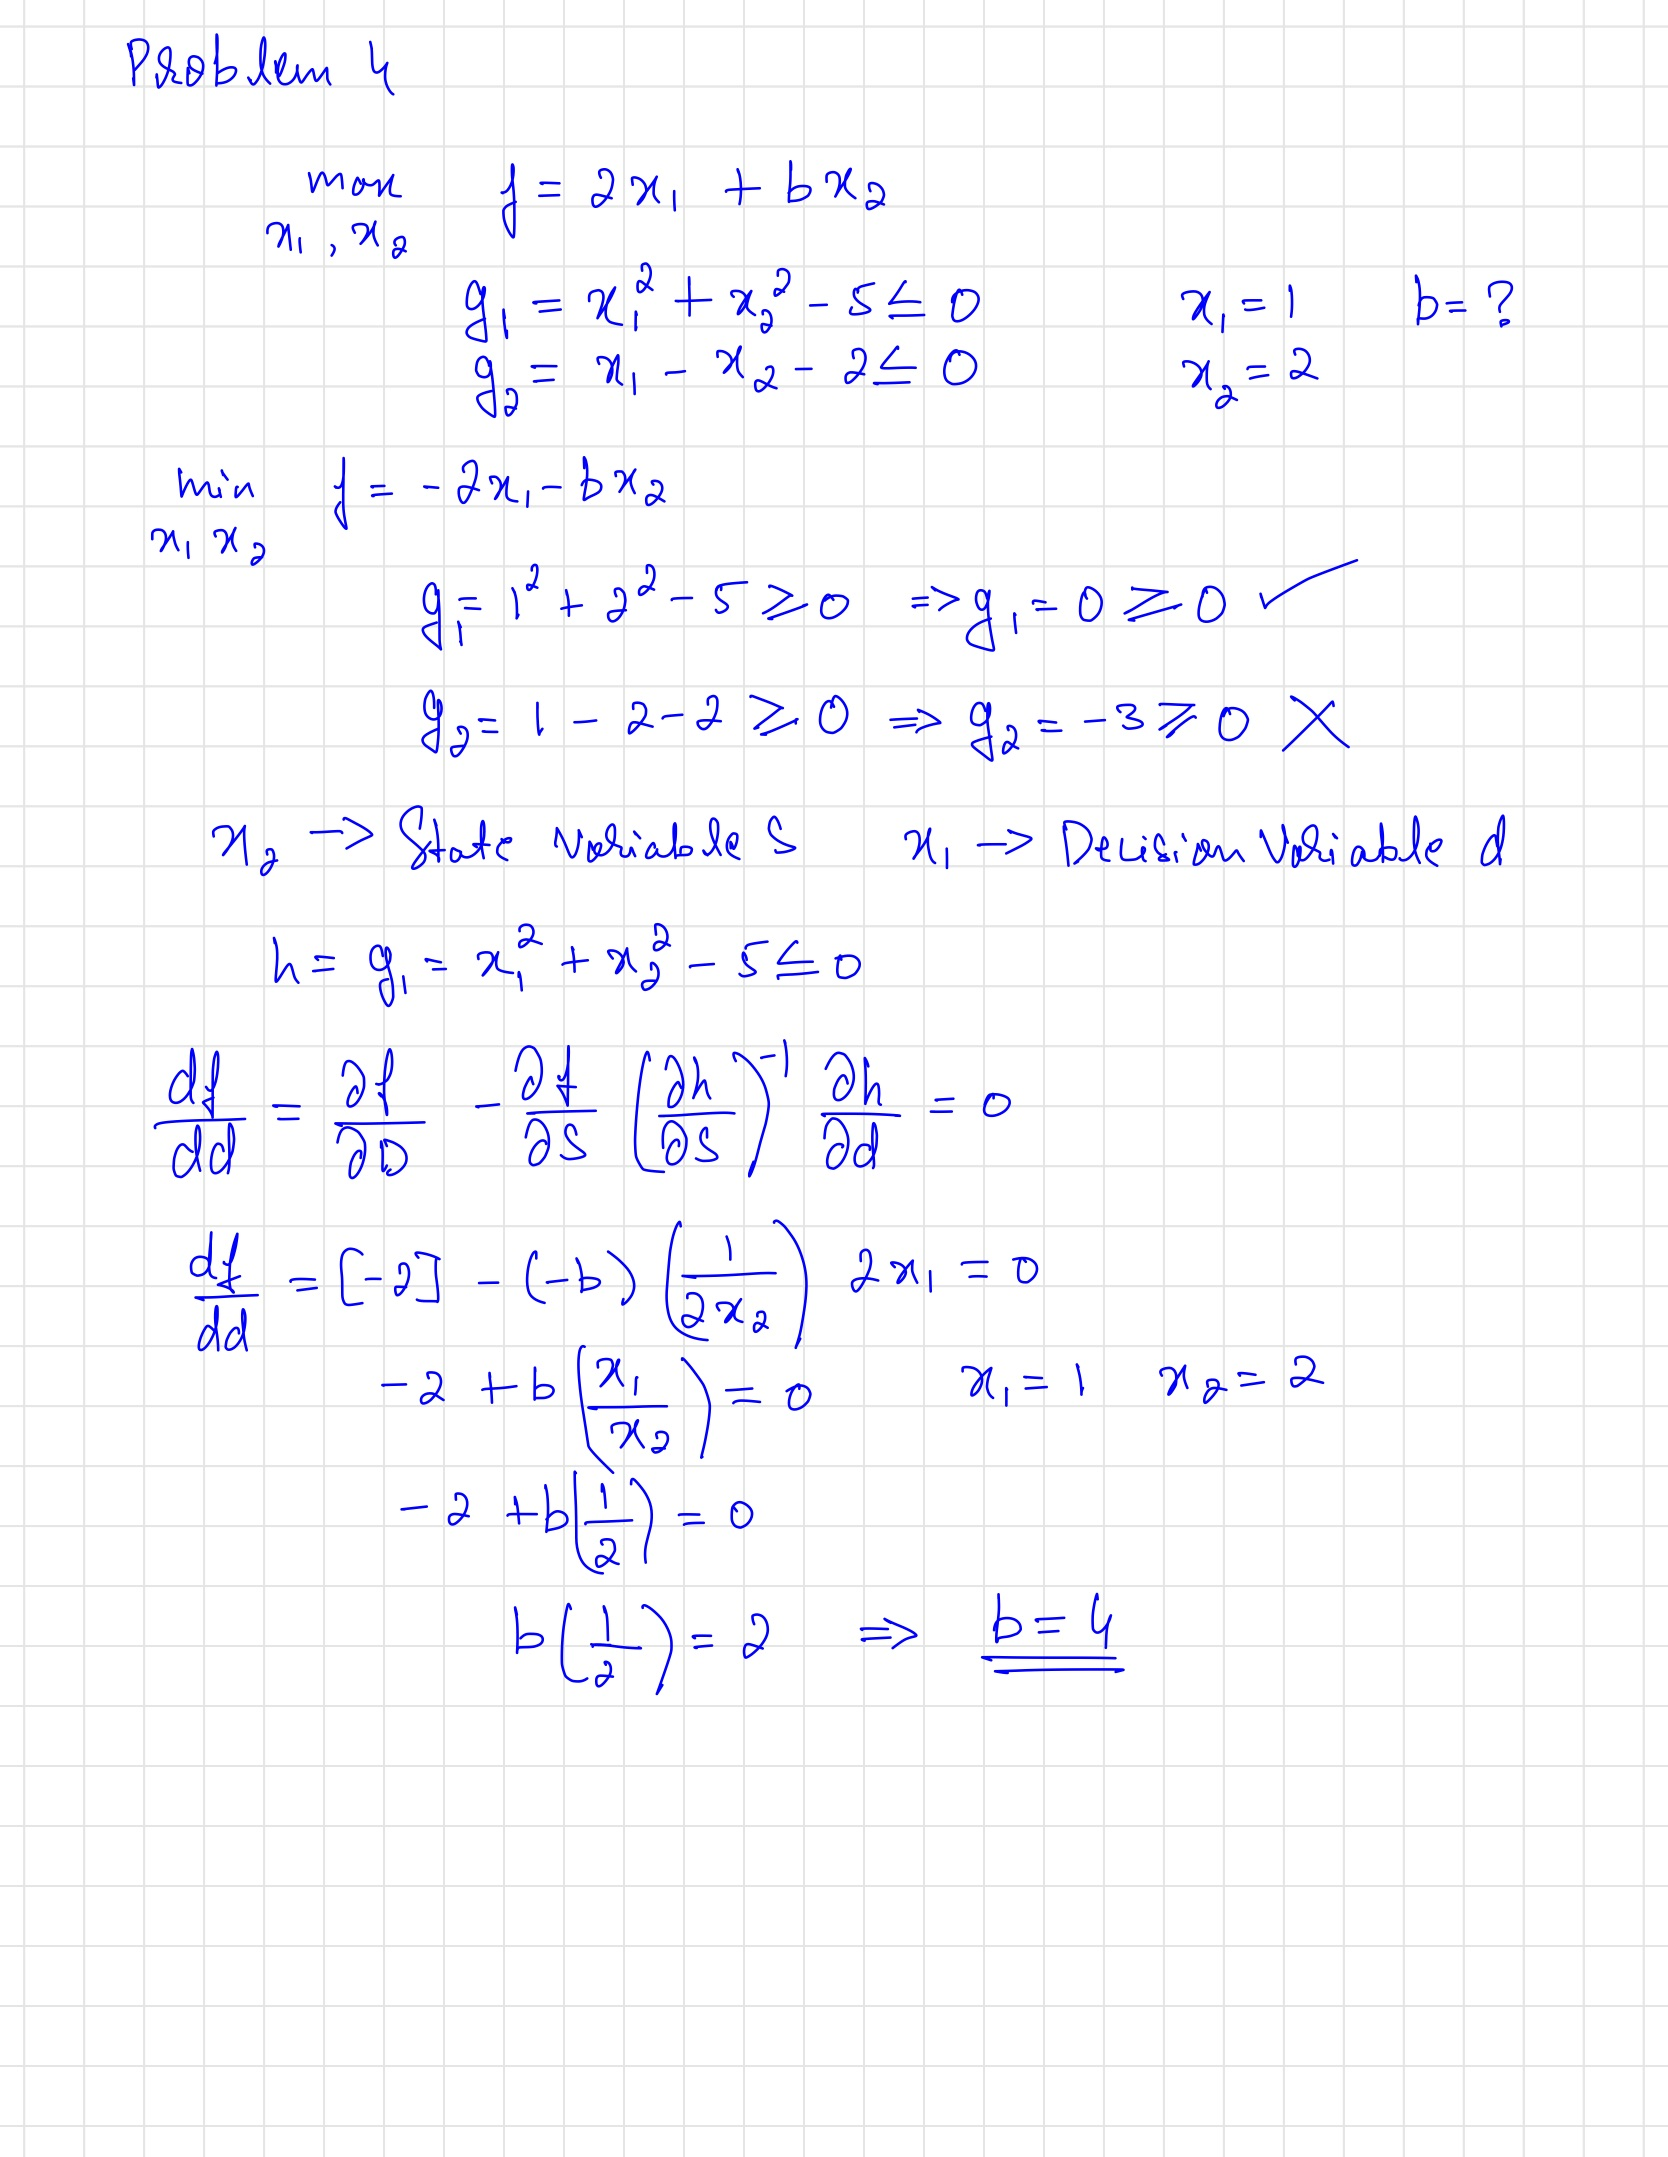

### Problem 5 (30 Points)

Find the solution for 

$$
\begin{aligned}
\min_{x_1,x_2,x_3} & \quad  f=x_{1}^{2}+x_{2}^{2}+x_{3}^{2}\\
{\text{subject to }} & \quad h_1 = x_{1}^{2}/4+x_{2}^{2}/5+x_{3}^{2}/25-1=0\\
& \quad h_2 = x_1+x_2-x_3= 0,
\end{aligned}
$$ 

by implementing the generalized reduced gradient algorithm.

In [1]:
# This code is bricked next code works
# Code goes here

import numpy
import matplotlib.pyplot as plt
from sympy import *

def generalized_reduced_gradient():
    
    x1, x2, x3 = x[0], x[1], x[2]
    xvars = [x1, x2, x3]
    
    fx = x1 ** 2 + x2 ** 2 + x3 ** 2
    h1 = ((x1 ** 2) / 4) + ((x2 ** 2) / 5) + ((x3 ** 2) / 25) - 1
    h2 = x1 + x2 - x3
    h_x = [h1, h2]
    a = 1
    g = 0.4
    itr_max = 50 
    itr_2 = 25
    eps1, eps2, eps3 = 0.001, 0.001, 0.001
    
    # initial
    xini = numpy.array([2, 4, 6])
    
    dfx = numpy.array([diff(fx, xvar) for xvar in xvars])
    dhxs = numpy.array([[diff(h_x, xvar) for xvar in xvars] for hx in h_x])
    nonvars = len(xvars) - len(h_x)
    optsoln = []
    
    for itr_max in range(itr_1):
        
        print('\n\nOuter itr: {0}, optim soln: {1}'.format(itr_max + 1, xini))
        optsoln.append(fx.subs(zip(xvars, xini)))
        
        # step 1
        
        del_f = numpy.array([df.subs(zip(xvars, xini)) for df in dfx])
        del_h = numpy.array([[dh.subs(zip(xvars, xini)) for dh in dhx] for dhx in dhxs])
        J = numpy.array([dhx[nonvars:] for dhx in del_h])
        C = numpy.array([dhx[:nonvars] for dhx in del_h])
        del_f_bar = del_f[nonvars:]
        del_f_cap = del_f[:nonvars]
        
        J_inv = numpy.linalg.inv(numpy.array(J, dtype=float))
        del_f_t = del_f_cap.dot(J_inv.dot(C))
        
        # step 2
        
        if abs(del_f_t[0]) <= eps1:
            break
            
        d_bar = - del_f_t.T
        d_cap = - J_inv.dot(C.dot(d_bar))
        d = np.concatenate((d_bar, d_cap)).T
        
        # 3
        
        a = a_0
        
        while a > 0.001:
            
            print('\nAlpha value: {0}\n'.format(a))
            
            # 3a
            
            v = xini.T + a * d
            v_bar = v[:nonvars]
            v_cap = v[nonvars:]
            flag = False
            
            for itr in range(itr_max):
                print('Itr: {0}, optim soln at x = {1}'.format(itr + 1, v))
                h = numpy.array([hx.subs(zip(xvars, v)) for hx in h_x])
                if all([abs(h_i) < eps2 for h_i in h]):
                    if fx.subs(zip(xvars, xini)) <= fx.subs(zip(xvars, v)):
                        a = a * g
                        break
                        
                    else:
                        
                        xini = v
                        flag = True
                        break
                        
                        
                # 3b
                
                del_h_v = numpy.array([[dh.subs(zip(xvars, v)) for dh in dhx] for dhx in dhxs])
                J_inv_v = numpy.linalg.inv(numpy.array([dhx[nonvars:] for dhx in del_h_v], dtype=float))
                v_n_cap = v_cap - J_inv_v.dot(h)
                
                # 3c
                
                if abs(numpy.linalg.norm(numpy.array(v_cap - v_n_cap, dtype=float), 1)) > eps3:
                    v_cap = v_n_cap
                    v = numpy.concatenate((v_bar, v_cap))
                    
                else:
                    v_cap = v_n_cap
                    v = numpy.concatenate((v_bar, v_cap))
                    h = numpy.arr([hx.subs(zip(xvars, v)) for hx in h_x])
                    if  all([abs(h_i) < eps2 for h_i in h]):
                        
                        # 3d
                        
                        if fx.subs(zip(xvars, xini)) <= fx.subs(zip(xvars, v)):
                            a = a * g
                            break
                            
                        else:
                            xini = v
                            flag = True
                            break
                            
                    else:
                        a = a * g
                        break
                        
            if flag == True:
                break
                
                
    print('\n\nFinal Soln is: {0}'.format(xini))
    print('Value of fn at point: {0}\n'.format(fx.subs(zip(xvars, xini))))
    
    plt.plot(optsoln, 'ro')
    plt.show()
    
    
if __name__ == '__main__':
    generalized_reduced_gradient()
        


NameError: name 'x' is not defined

In [39]:
import numpy
import matplotlib.pyplot as plt
import math

# def h(x):
#     h1 = ((x[0] ** 2) / 4) + ((x[1] ** 2) / 5) + ((x[2] ** 2) / 25) - 1
#     h2 = x[0] + x[1] - x[2]
#     return numpy.array([h1, h2])

def fun(x):
#     x0 = x[0]
#     x1 = x[1]
#     x2 = x[2]
    return  x[0] ** 2 + x[1] ** 2 + x[2] ** 2

def Dfdd(x):
    return 2*x[0]

def dfds(x):
    return numpy.array([2*x[1], 2*x[2]])

def dhds(x):
    return numpy.array([[2/5*x[1] , 2/25*x[2]], [1, -1]])

def dhdd(x):
    return numpy.array([[x[0]/2], [1]])

def DfDd(x):
    return Dfdd(x) - numpy.matmul(numpy.matmul(dfds(x), numpy.linalg.inv(dhds(x))), dhdd(x))

# def g(x):
#     return numpy.array([[x[0]/2, 2*x[1]/5, 2*x[2]/25], [1, 1, -1]])

def x_e(x, a, dfdd):
    d_eval = (x[0] - a * dfdd)[0]
    s_eval = x[1:3] + a * numpy.transpose(numpy.matmul(numpy.matmul(numpy.linalg.inv(dhds(x)), dhdd(x)), numpy.transpose([DfDd(x)])))[0]
    return numpy.append(d_eval, s_eval)

# n_dfdd = numpy.linalg.norm(numpy.array([[x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1], [x[0]+x[1]-x[2]]])) 
# d = x[0]
# s = x[1], x[2]


# def line_search(dfdd, x):
   
#     a=1
#     b=0.5
#     t=0.3
    
#     g_0 = g(x)
#     h_0 = h(x)
#     dk_1 = 
    
#     def x_e(x, a, dfdd):
#         d = (x[0] - a*dfdd)[0]
#         s = x[1:3] + a * numpy.transpose(numpy.matmul(numpy.matmul(numpy.linalg.inv(dhds(x)), dhdd(x)), numpy.transpose([DhDD(x)])))[0]
#         return numpy.append(d, s)
    
#     x_f=dk-alpha*dfdd(dk),sk+alpha * 
#     np.transpose(np.matmul(np.matmul(np.linalg.inv(phps(dk)),phpd(dk)),
#                            np.transponse(dfdd(dk))))
#     while fun(x_0(x, a, dfdd)) > (fun(x) - a * t * dfdd ** 2):
#         a = b * a
#     return a
    
# def sol(x):
#     while numpy.linalg.norm(numpy.array([[x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1], [x[0]+x[1]-x[2]]])) > e:
        
# #         while numpy.linalg.norm(numpy.array(h_x)) > e:
#         dhds = dhds(x)
#         s_J = numpy.transpose(numpy.transpose([x[1:3]]) - numpy.matmul(numpy.linalg.inv(dhds), numpy.array(h(x))))
#         x = numpy.append(x[0:1], numpy.transpose(s_J[0]))
#     return x
                              


# def linesearch(f, g, h, dhdd, x, d_0, s_0): # This doesn't work
def line_search(dfdd, x):
    a = 0.5
    b = .8
    t = .5
    while fun(x_e(x, a, dfdd)) > (fun(x) - a * t * dfdd ** 2):
        a = b * a
    return a
    
def sol(x):
    while numpy.linalg.norm(numpy.array(
            [[x[0] ** 2 / 4 + x[1] ** 2 / 5 + x[2] ** 2 / 25 - 1], [x[0] + x[1] - x[2]]])) > e:
        
#         while numpy.linalg.norm(numpy.array(h_x)) > e:
        dh_ds = dhds(x)
        sk_1 = numpy.transpose(numpy.transpose([x[1:3]]) - numpy.matmul(numpy.linalg.inv(dh_ds), numpy.array([[x[0] ** 2 / 4 + x[1] ** 2 / 5 + x[2] ** 2 / 25 - 1],[x[0] + x[1] - x[2]]])))
        x = numpy.append(x[0:1], numpy.transpose(sk_1[0]))
    return x

# e = 0.001
# x_store = []
x[0] = 0
x[2] = (25 - 25 / 4 * x[0] ** 2 - 5 * x[0] ** 2) ** (1 / 2)
x[1] = x[2] - x[0]

x_0 = numpy.array([x0, x1, x2])
e = 0.003

x_store = [x_0]

error = []

                              
while numpy.linalg.norm(DfDd(x_store[-1])) > e:
    x = x_store[-1]
    df_dd = DfDd(x)
    error.append(math.log(numpy.linalg.norm(df_dd)))
    a = line_search(df_dd, x)
    d_k = x[0] - a * df_dd
    sk_0 = x[1:3] + a * numpy.transpose(numpy.matmul(numpy.matmul(numpy.linalg.inv(dhds(x)), dhdd(x)), numpy.transpose(df_dd)))
    xk_0 = numpy.append(d_k, sk_0)
    x = sol(xk_0)
    x_store.append(x)
    
print(x_store[-1])

[-1.57574884  1.37815889 -0.19758995]
